# <center> <u> Interest Rate Dynamics </u> </center> 

In [1]:
import requests
import numpy as np
import pandas as pd 

from numba import jit, prange
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

## <center> Set Seaborn Theme </center>

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (10, 6))

## <center> Parse Treasury Data </center> 

In [3]:
years = [2021, 2022, 2023]
URL = [
    "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/",
    "/all?field_tdr_date_value=",
    "&type=daily_treasury_yield_curve&page&_format=csv",
      ]

In [4]:
df_list = []

for y in years:
    tmp_df = pd.read_csv(URL[0] + str(y) + URL[1] + str(y) + URL[2])
    df_list.append(tmp_df.iloc[::-1])

In [5]:
df = pd.concat(df_list, ignore_index = True)

In [6]:
df.head()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,4 Mo
0,01/04/2021,0.09,0.09,0.09,0.09,0.10,0.11,0.16,0.36,0.64,0.93,1.46,1.66,NaN
1,01/05/2021,0.08,0.09,0.09,0.09,0.10,0.13,0.17,0.38,0.66,0.96,1.49,1.70,NaN
2,01/06/2021,0.09,0.09,0.09,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81,NaN
3,01/07/2021,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85,NaN
4,01/08/2021,0.08,0.08,0.08,0.09,0.10,0.14,0.24,0.49,0.81,1.13,1.67,1.87,NaN


In [7]:
df.tail()

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,4 Mo
700,10/19/2023,5.58,5.57,5.60,5.56,5.44,5.14,5.01,4.95,5.00,4.98,5.30,5.11,5.62
701,10/20/2023,5.56,5.56,5.58,5.54,5.41,5.07,4.93,4.86,4.93,4.93,5.27,5.09,5.61
702,10/23/2023,5.57,5.57,5.58,5.56,5.42,5.05,4.89,4.81,4.87,4.86,5.19,5.01,5.59
703,10/24/2023,5.57,5.57,5.58,5.57,5.41,5.02,4.91,4.82,4.86,4.83,5.15,4.96,5.60
704,10/25/2023,5.56,5.57,5.59,5.57,5.43,5.08,4.98,4.89,4.98,4.95,5.27,5.09,5.61


In [8]:
df = df.drop(columns = ["4 Mo"])

## <center> Yield Curve </center> 

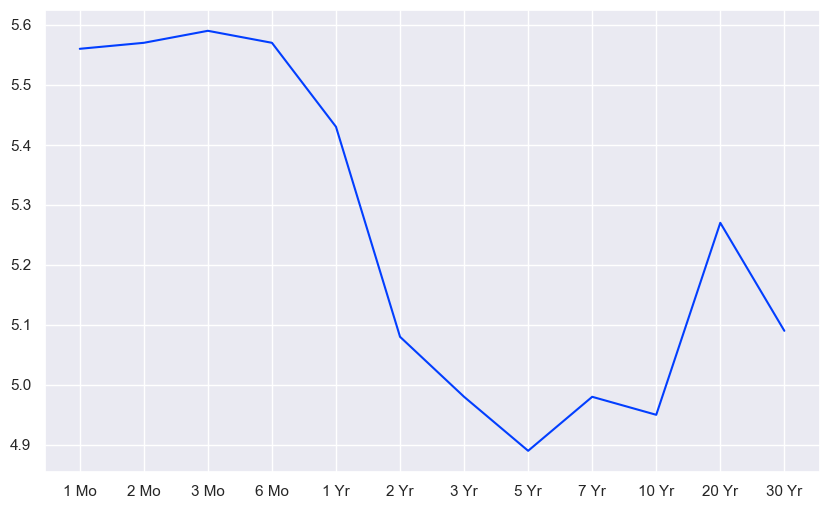

In [9]:
ax = sns.lineplot(
    x = df.columns[1:],
    y = df.iloc[-1].to_numpy()[1:],
)

plt.show()

In [10]:
# Bills 
three_month_rate = df["3 Mo"].to_numpy() / 100
six_month_rate = df["6 Mo"].to_numpy() / 100
one_year_rate = df["1 Yr"].to_numpy() / 100

# Notes
two_year_rate = df["2 Yr"].to_numpy() / 100
five_year_rate = df["5 Yr"].to_numpy() / 100
seven_year_rate = df["7 Yr"].to_numpy() / 100
ten_year_rate = df["10 Yr"].to_numpy() / 100

# Bonds
twenty_year_rate = df["20 Yr"].to_numpy() / 100
thirty_year_rate = df["30 Yr"].to_numpy() / 100

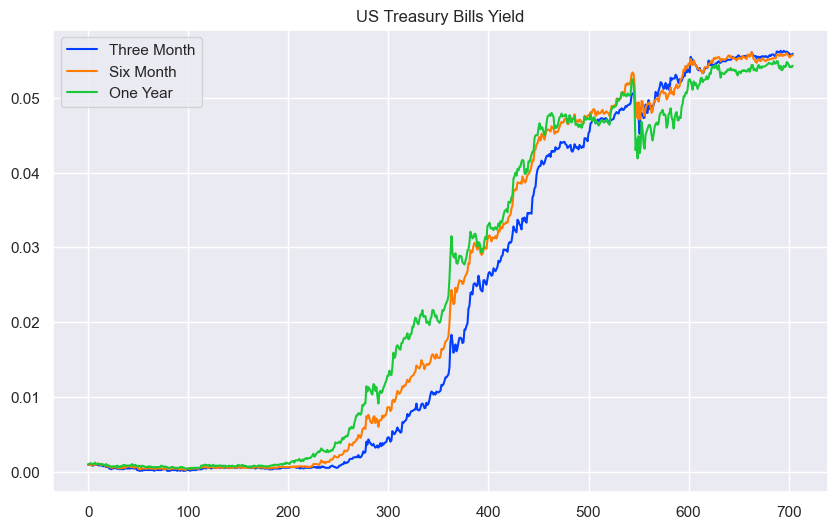

In [11]:
ax = sns.lineplot(
    data = three_month_rate,
    label = "Three Month",
)

sns.lineplot(
    data = six_month_rate,
    label = "Six Month",
)

sns.lineplot(
    data = one_year_rate,
    label = "One Year",
)

ax.set(
    title = "US Treasury Bills Yield"
)

plt.show()

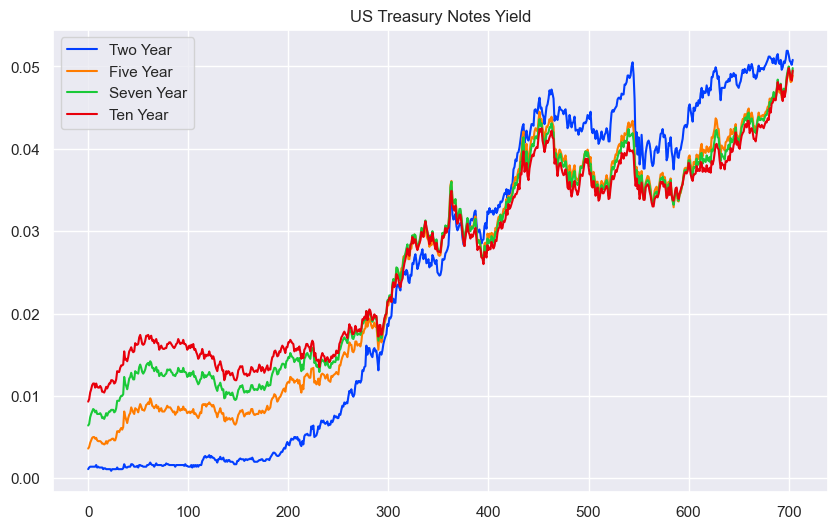

In [12]:
ax = sns.lineplot(
    data = two_year_rate,
    label = "Two Year",
)

sns.lineplot(
    data = five_year_rate,
    label = "Five Year",
)

sns.lineplot(
    data = seven_year_rate,
    label = "Seven Year",
)

sns.lineplot(
    data = ten_year_rate,
    label = "Ten Year",
)

ax.set(
    title = "US Treasury Notes Yield"
)

plt.show()

[]

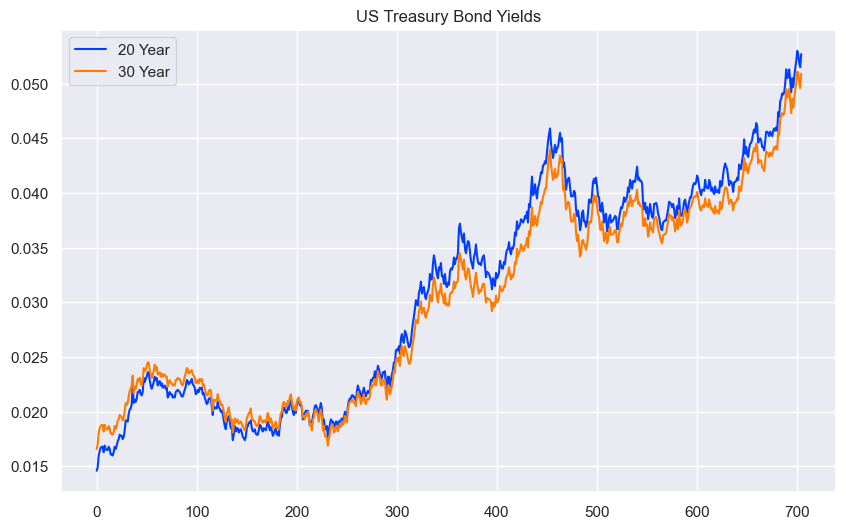

In [13]:
ax = sns.lineplot(
    data = twenty_year_rate,
    label = "20 Year",
)

sns.lineplot(
    data = thirty_year_rate,
    label = "30 Year",
)

ax.set(
    title = "US Treasury Bond Yields",
)

plt.plot()

## <center> Three Month Treasury Bill </center> 

## <center> $ P = \frac{FV}{(1 + \frac{r}{4})} $ </center>

In [14]:
@jit(nopython = True)
def compute_three_month_treasury_bill_price(bond_yields):
    """
    - Three Month Treasury Bill is a Zero Coupon Bond
    - Pays Interest With Face Value at Maturity 
    """
    
    FV = 100
    L = len(bond_yields)
    P = np.copy(bond_yields)
    
    for i in range(L):
        P[i] = FV / (1 + (bond_yields[i] / 4))
    
    return P

## <center> Six Month Treasury Bill </center> 

## <center> $ P = \frac{FV}{(1 + \frac{r}{2})} $ </center>

In [15]:
@jit(nopython = True)
def compute_six_month_treasury_bill_price(bond_yields):
    """
    - Six Month Treasury Bill is a Zero Coupon Bond
    - Pays Interest With Face Value at Maturity     
    """
    
    FV = 100
    L = len(bond_yields)
    P = np.copy(bond_yields)
    
    for i in range(L):
        P[i] = FV / (1 + (bond_yields[i] / 2))
    
    return P

## <center> One Year Treasury Bill </center> 

## <center> $ P = \frac{FV}{(1 + r)} $ </center>

In [16]:
@jit(nopython = True)
def compute_one_year_treasury_bill_price(bond_yields):
    """
    
    """
    
    FV = 100
    L = len(bond_yields)
    P = np.copy(bond_yields)
    
    for i in range(L):
        P[i] = FV / (1 + bond_yields[i])

    return P

## <center> Notes & Bonds </center> 

## <center> $ P = \sum_{i=1}^{N} [\frac{C_{i}}{(1 + \frac{r}{2})^{N}}] + \frac{FV}{(1 + \frac{r}{2})^{N}}$ </center>

In [17]:
@jit(nopython = True)
def compute_treasury_note_price(bond_yields, years):
    """
    
    """
    
    FV = 100
    N = 2 * years
    L = len(bond_yields)
    P = np.copy(bond_yields)
    
    for i in range(L):
        
        cashflows = np.zeros(N)
        C = bond_yields[i] / 2
        
        for j in range(N):
            cashflows[j] = C / (1 + (1 + bond_yields[i] / 2))**(j+1)
            
        PV = FV / (1 + (bond_yields[i] / 2))**N
        P[i] = np.sum(cashflows) + PV
    
    return P

In [18]:
# Bills
three_month_prices = compute_three_month_treasury_bill_price(three_month_rate)
six_month_prices = compute_six_month_treasury_bill_price(six_month_rate)
one_year_prices = compute_one_year_treasury_bill_price(one_year_rate)

# Notes
two_year_note_prices = compute_treasury_note_price(two_year_rate, 2)
five_year_note_prices = compute_treasury_note_price(five_year_rate, 5)
seven_year_note_prices = compute_treasury_note_price(seven_year_rate, 7)
ten_year_note_prices = compute_treasury_note_price(ten_year_rate, 10)

# Bonds
twenty_year_note_prices = compute_treasury_note_price(twenty_year_rate, 20)
thirty_year_note_prices = compute_treasury_note_price(thirty_year_rate, 30)

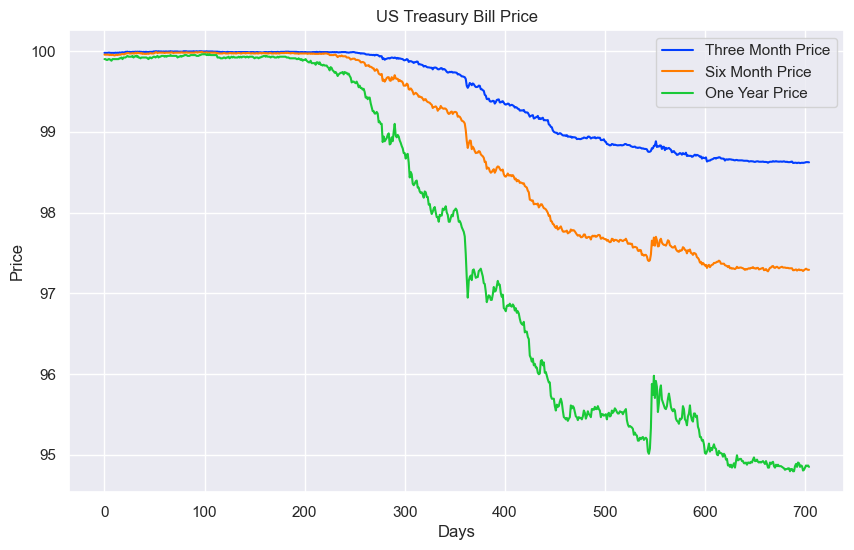

In [19]:
ax = sns.lineplot(
    data = three_month_prices,
    label = "Three Month Price"
)

sns.lineplot(
    data = six_month_prices,
    label = "Six Month Price"
)

sns.lineplot(
    data = one_year_prices,
    label = "One Year Price"
)

ax.set(
    title = "US Treasury Bill Price",
    xlabel = "Days",
    ylabel = "Price",
)

plt.show()

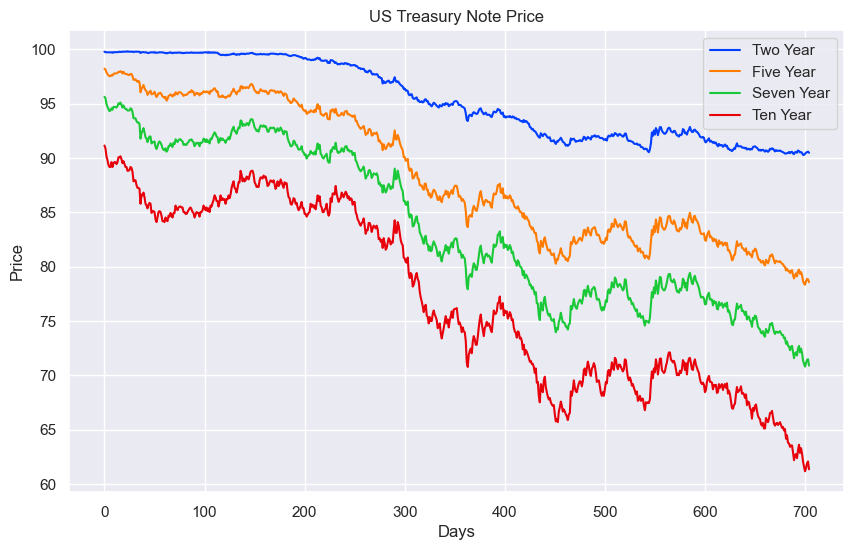

In [20]:
ax = sns.lineplot(
    data = two_year_note_prices,
    label = "Two Year",
)

sns.lineplot(
    data = five_year_note_prices,
    label = "Five Year",
)

sns.lineplot(
    data = seven_year_note_prices,
    label = "Seven Year",
)

sns.lineplot(
    data = ten_year_note_prices,
    label = "Ten Year",
)

ax.set(
    title = "US Treasury Note Price",
    xlabel = "Days",
    ylabel = "Price",
)

plt.show()

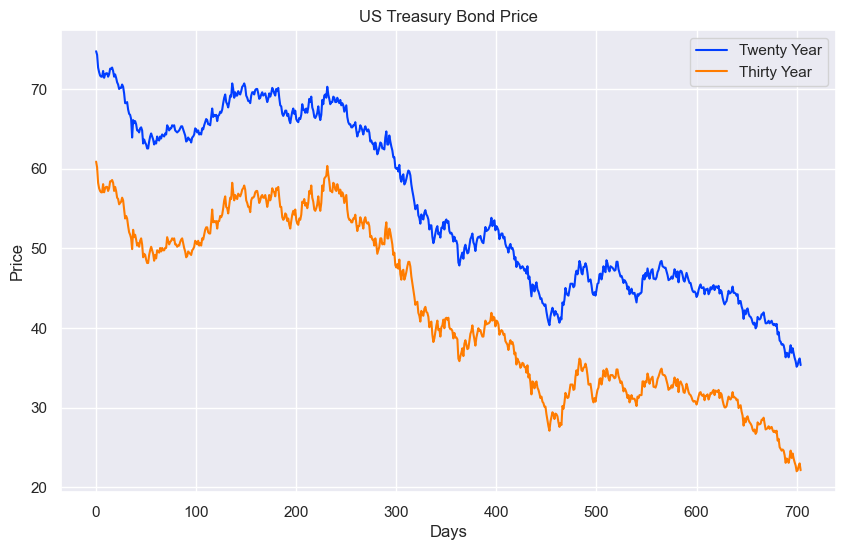

In [21]:
ax = sns.lineplot(
    data = twenty_year_note_prices,
    label = "Twenty Year",
)

sns.lineplot(
    data = thirty_year_note_prices,
    label = "Thirty Year",
)

ax.set(
    title = "US Treasury Bond Price",
    xlabel = "Days",
    ylabel = "Price",
)

plt.show()

## <center> Price Versus Interest Rate </center> 

In [22]:
r = np.linspace(1, 10, 1000) / 100

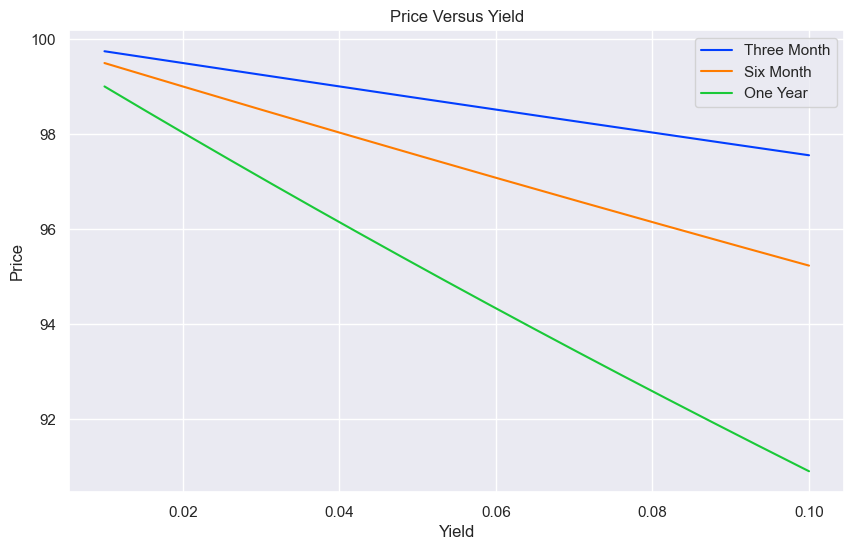

In [42]:
ax = sns.lineplot(
    x = r,
    y = compute_three_month_treasury_bill_price(r),
    label = "Three Month"
)

sns.lineplot(
    x = r,
    y = compute_six_month_treasury_bill_price(r),
    label = "Six Month",
)

sns.lineplot(
    x = r,
    y = compute_one_year_treasury_bill_price(r),
    label = "One Year"
)

ax.set(
    title = "Price Versus Yield",
    xlabel = "Yield",
    ylabel = "Price"
)

plt.show()

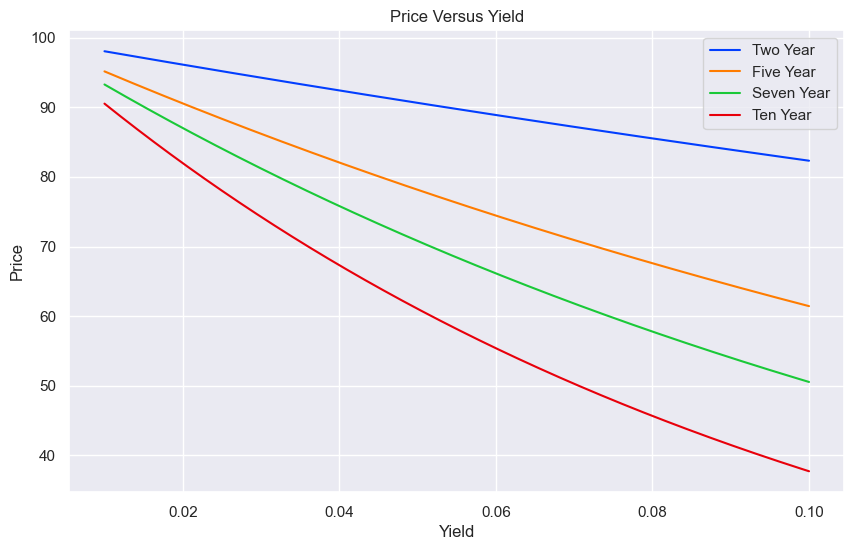

In [43]:
ax = sns.lineplot(
    x = r,
    y = compute_treasury_note_price(r, 2),
    label = "Two Year"
)

sns.lineplot(
    x = r,
    y = compute_treasury_note_price(r, 5),
    label = "Five Year",
)

    
sns.lineplot(
    x = r,
    y = compute_treasury_note_price(r, 7),
    label = "Seven Year"
)

sns.lineplot(
    x = r,
    y = compute_treasury_note_price(r, 10),
    label = "Ten Year"
)

ax.set(
    title = "Price Versus Yield",
    xlabel = "Yield",
    ylabel = "Price"
)

plt.show()

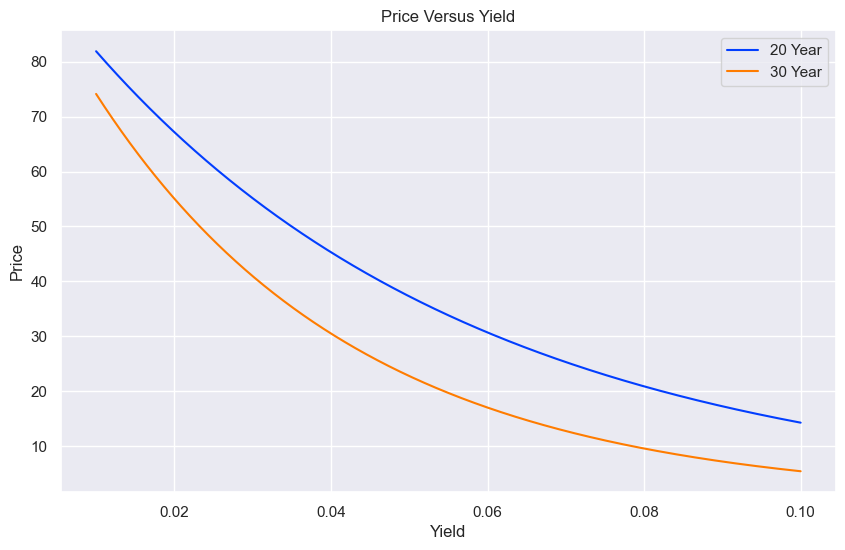

In [44]:
ax = sns.lineplot(
    x = r,
    y = compute_treasury_note_price(r, 20),
    label = "20 Year"
)

sns.lineplot(
    x = r,
    y = compute_treasury_note_price(r, 30),
    label = "30 Year",
)

ax.set(
    title = "Price Versus Yield",
    xlabel = "Yield",
    ylabel = "Price"
)

plt.show()

## <center> Three Month Duration </center>

## <center> $ \frac{\partial}{\partial r} = -\frac{FV}{(1 + \frac{r}{4})^{2}} $ </center>

In [26]:
@jit(nopython = True)
def compute_three_month_duration(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (1 / bond_prices[i]) * -FV / (1 + (bond_yields[i] / 4))**2
    
    return D 

## <center> Three Month Convexity </center>

## <center> $ \frac{\partial}{\partial r} = 2 \cdot \frac{FV}{(1 + \frac{r}{4})^{3}} $ </center>

In [27]:
@jit(nopython = True)
def compute_three_month_convexity(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (1 / bond_prices[i]) * 2 * FV / (1 + (bond_yields[i] / 4))**3
    
    return D 

## <center> Six Month Duration </center>

## <center> $ \frac{\partial}{\partial r} = -\frac{FV}{(1 + \frac{r}{2})^{2}} $ </center>

In [28]:
@jit(nopython = True)
def compute_six_month_duration(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (1 / bond_prices[i]) * -FV / (1 + (bond_yields[i] / 2))**2
    
    return D 

## <center> Six Month Convexity </center>

## <center> $ \frac{\partial}{\partial r} = 2 \cdot \frac{FV}{(1 + \frac{r}{2})^{3}} $ </center>

In [29]:
@jit(nopython = True)
def compute_six_month_convexity(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (1 / bond_prices[i]) * 2 * FV / (1 + (bond_yields[i] / 2))**3
    
    return D 

## <center> One Year Duration </center>

## <center> $ \frac{\partial}{\partial r} = - \frac{FV}{(1 + r)^{2}} $ </center>

In [30]:
@jit(nopython = True)
def compute_one_year_duration(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (1 / bond_prices[i]) * -FV / (1 + bond_yields[i])**2

    return D 

## <center> One Year Convexity </center>

## <center> $ \frac{\partial}{\partial r} = 2 \cdot \frac{FV}{(1 + r)^{3}} $ </center>

In [31]:
@jit(nopython = True)
def compute_one_year_convexity(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (1 / bond_prices[i]) * 2 * FV / (1 + bond_yields[i])**3
    
    return D 

In [32]:
three_month_duration = compute_three_month_duration(three_month_rate, three_month_prices)
six_month_duration = compute_six_month_duration(six_month_rate, six_month_prices)
one_year_duration = compute_one_year_duration(one_year_rate, one_year_prices)

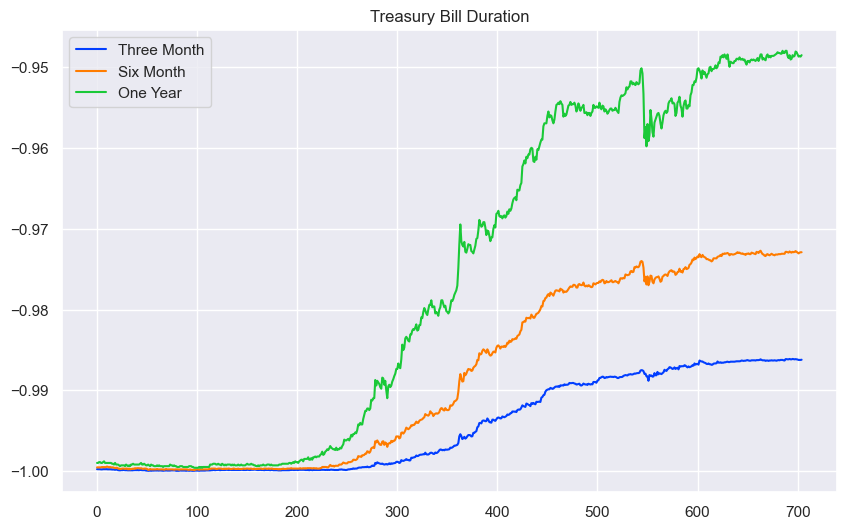

In [33]:
ax = sns.lineplot(
    data = three_month_duration,
    label = "Three Month"
)

sns.lineplot(
    data = six_month_duration,
    label = "Six Month"
)

sns.lineplot(
    data = one_year_duration,
    label = "One Year"
)


ax.set(
    title = "Treasury Bill Duration"
)

plt.show()

In [34]:
three_month_duration = compute_three_month_duration(r, compute_three_month_treasury_bill_price(r))
six_month_duration = compute_six_month_duration(r, compute_six_month_treasury_bill_price(r))
one_year_duration = compute_one_year_duration(r, compute_one_year_treasury_bill_price(r))

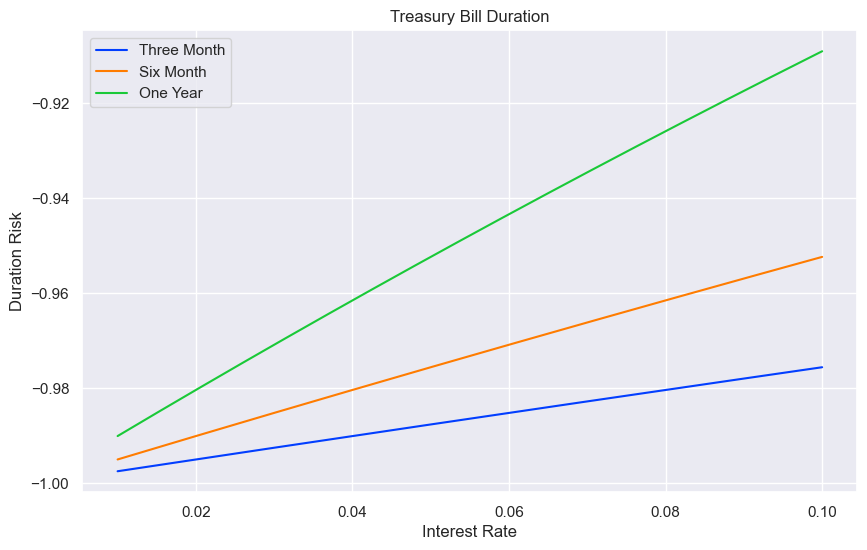

In [35]:
ax = sns.lineplot(
    x = r,
    y = three_month_duration,
    label = "Three Month"
)

sns.lineplot(
    x = r,
    y = six_month_duration,
    label = "Six Month"
)

sns.lineplot(
    x = r,
    y = one_year_duration,
    label = "One Year"
)


ax.set(
    title = "Treasury Bill Duration",
    xlabel = "Interest Rate",
    ylabel = "Duration Risk"
)

plt.show()

In [36]:
three_month_convexity = compute_three_month_convexity(three_month_rate, three_month_prices)
six_month_convexity = compute_six_month_convexity(six_month_rate, six_month_prices)
one_year_convexity = compute_one_year_convexity(one_year_rate, one_year_prices)

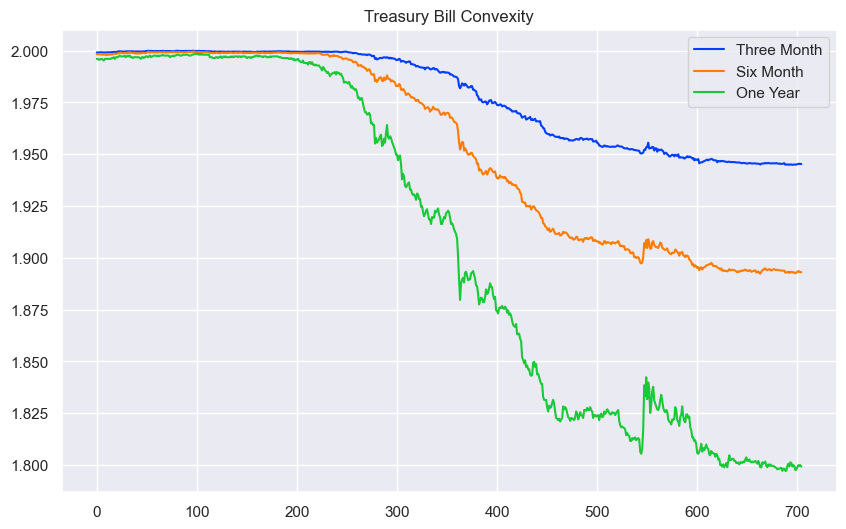

In [37]:
ax = sns.lineplot(
    data = three_month_convexity,
    label = "Three Month"
)

sns.lineplot(
    data = six_month_convexity,
    label = "Six Month"
)

sns.lineplot(
    data = one_year_convexity,
    label = "One Year"
)


ax.set(
    title = "Treasury Bill Convexity"
)

plt.show()

In [38]:
three_month_convexity = compute_three_month_convexity(r, compute_three_month_treasury_bill_price(r))
six_month_convexity = compute_six_month_convexity(r, compute_six_month_treasury_bill_price(r))
one_year_convexity = compute_one_year_convexity(r, compute_one_year_treasury_bill_price(r))

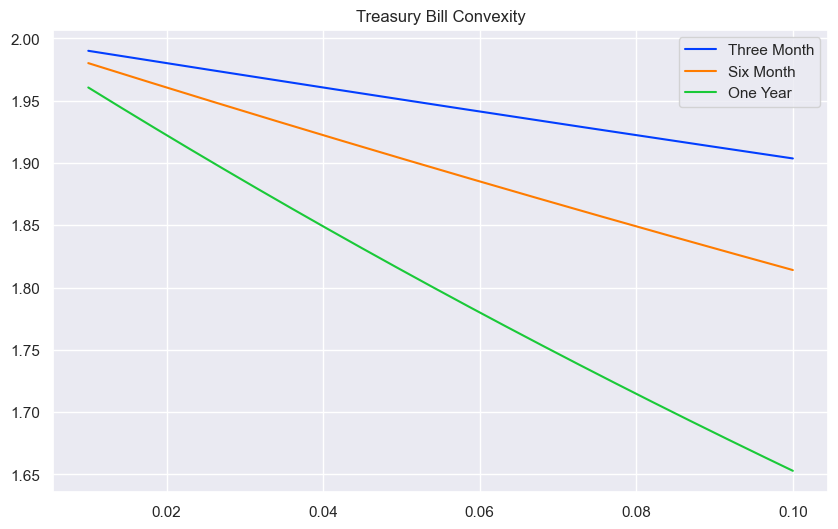

In [39]:
ax = sns.lineplot(
    x = r,
    y = three_month_convexity,
    label = "Three Month"
)

sns.lineplot(
    x = r,
    y = six_month_convexity,
    label = "Six Month"
)

sns.lineplot(
    x = r,
    y = one_year_convexity,
    label = "One Year"
)


ax.set(
    title = "Treasury Bill Convexity"
)

plt.show()

## <center> Duration </center>

## <center> $ \frac{\partial}{\partial r} = -\frac{FV}{(1 + \frac{r}{2})^{2}} $ </center>

In [40]:
@jit(nopython = True)
def compute_duration(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (1 / bond_prices[i]) * -FV / (1 + bond_yields[i])**2
    
    return D 

## <center> Convexity </center>

## <center> $ \frac{\partial}{\partial r^{2}} = 2 \cdot \frac{FV}{(1 + \frac{r}{2})^{3}}$ </center> 

In [41]:
@jit(nopython = True)
def compute_convexity(bond_yields, bond_prices):
    """
    
    """
    
    FV = 100
    N = len(bond_yields)
    D = np.copy(bond_yields)
    
    for i in range(N):
        D[i] = (2 / bond_prices[i]) * (FV / (1 + bond_yields[i])**3)
    
    return D 